# Exercise 2.3
## Contracting General Tensor Networks

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from time import process_time
from tqdm import tqdm

from exercise3_2 import (RandomFourTensorNetwork,
                            random_tensor_network,
                            # cost,
                            max_bond_contraction,
                            exhaustive_search_contraction)

### Running the example on the sheet
As a first test we will take a tensor network with the shape shown in the exercise.

In [2]:
example_tn = random_tensor_network()

# Overwriting random entries with our example
example_tn.bond_dims = {0: 2, 1: 5, 2: 3, 3: 2}
example_tn.edges = {0: (0,1), 1: (1,2), 2: (1,3), 3: (2,3)}
example_tn.tensors = [[0], [0,1,2], [1,3], [2,3]]

print(example_tn.bond_dims)
print(example_tn.edges)
print(example_tn.tensors)

NameError: name 'random_tensor_network' is not defined

In [4]:
max_contraction_order = max_bond_contraction(example_tn)
optimal_contraction_order = exhaustive_search_contraction(example_tn)

print(f"Contraction order by maximum leg dimension: {max_contraction_order}")
print(f"Optimal contraction order: {optimal_contraction_order}")

NameError: name 'example_tn' is not defined

In [55]:
example_tn = random_tensor_network()
import copy
# Overwriting random entries with our example
example_tn.bond_dims = {0: 2, 1: 5, 2: 3, 3: 2}
example_tn.edges = {0: (0,1), 1: (1,2), 2: (1,3), 3: (2,3)}
example_tn.tensors = [[0], [0,1,2], [1,3], [2,3]]

# print(example_tn.bond_dims)
# print(example_tn.edges)
# print(example_tn.tensors)


def cost(base_tn: RandomFourTensorNetwork, contract_order: list):
    # TODO: Subproblem (b)
    base2 = copy.deepcopy(base_tn)
    contract_cost = 0
    for i in range(len(contract_order)):
        (t1,t2) = base2.edges[contract_order[i]]
        prod = 1
        bond_list = (base2.tensors[t1] + list(set(base2.tensors[t2]) - set(base2.tensors[t1])))
        for j in bond_list:
            prod *= base2.bond_dims[j]
        base2.contract(contract_order[i])
        contract_cost += prod
    return contract_cost

max_contraction_order = [0, 1, 2, 3]
print(max_contraction_order)


cost_max =  cost(example_tn, max_contraction_order)
# cost_optimal = cost(example_tn, optimal_contraction_order)

print(f"Cost for contraction order with maximum: {cost_max}")
# print(f"Minimal cost: {cost_optimal}")
# print(f"Difference: {cost_max - cost_optimal}")

[0, 1, 2, 3]
Cost for contraction order with maximum: 68


In [28]:
# contract_cost = 0
# print(max_contraction_order)
# for i in range(len(max_contraction_order)):
#     (t1,t2) = example_tn.edges[i]
#     prod = len(example_tn.tensors[t1])*len(example_tn.tensors[t2])*example_tn.bond_dims[max_contraction_order[i]]
#     # example_tn.contract(max_contraction_order[i])
#     contract_cost += prod
    
# print(contract_cost)

cost_max =  cost(example_tn, max_contraction_order)
# cost_optimal = cost(example_tn, optimal_contraction_order)

print(f"Cost for contraction order with maximum: {cost_max}")
# print(f"Minimal cost: {cost_optimal}")
# print(f"Difference: {cost_max - cost_optimal}")

Cost for contraction order with maximum: 54


In [69]:
import itertools

example_tn = random_tensor_network()

# Overwriting random entries with our example
example_tn.bond_dims = {0: 2, 1: 5, 2: 3, 3: 2}
example_tn.edges = {0: (0,1), 1: (1,2), 2: (1,3), 3: (2,3)}
example_tn.tensors = [[0], [0,1,2], [1,3], [2,3]]


def exhaustive_search_contraction(tn: RandomFourTensorNetwork):
    listOfPermuations = list(itertools.permutations(range(0,4)))

    dummy = 999999999
    returnValue = list(listOfPermuations[10])
    for i in range(len(listOfPermuations)):
        print(i)
        # print(type(list(listOfPermuations[i])))
        # print(list(listOfPermuations[i]))
        new_cost = cost(tn, list(listOfPermuations[i]))
        if (new_cost < dummy):
            dummy = new_cost
            returnValue = list(listOfPermuations[i])
    return returnValue

    



exhaustive_search_contraction(example_tn)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


[0, 1, 2, 3]

We see that the two contraction orders are not the same. This can also be seen in the cost associated to each of the contraction orders. The next question is, which version is faster? There are two parts to this, the time needed to find the contraction order and the time required to compute the contraction.

## Running many samples

In [5]:
num_samples = 100 # Number of different TN to test

find_time_max_list = []
find_time_optimal_list = []
contract_cost_max_list = []
contract_cost_optimal_list = []

for sample in tqdm(range(num_samples)):
    
    # Generating a random tensor network as a sample
    tn = random_tensor_network()
    
    # Heuristic Search
    t1 = process_time()
    max_contraction_order = max_bond_contraction(tn)
    t2 = process_time()
    find_time_max_list.append(t2 - t1)
    max_cost = cost(tn, max_contraction_order)
    contract_cost_max_list.append(max_cost)
    
    # Exhaustive Search
    t1 = process_time()
    optimal_contraction_order = exhaustive_search_contraction(tn)
    t2 = process_time()
    find_time_optimal_list.append(t2 - t1)
    optimal_cost = cost(tn, optimal_contraction_order)
    contract_cost_optimal_list.append(optimal_cost)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [04:14<00:00,  2.55s/it]


No we will plot the results.

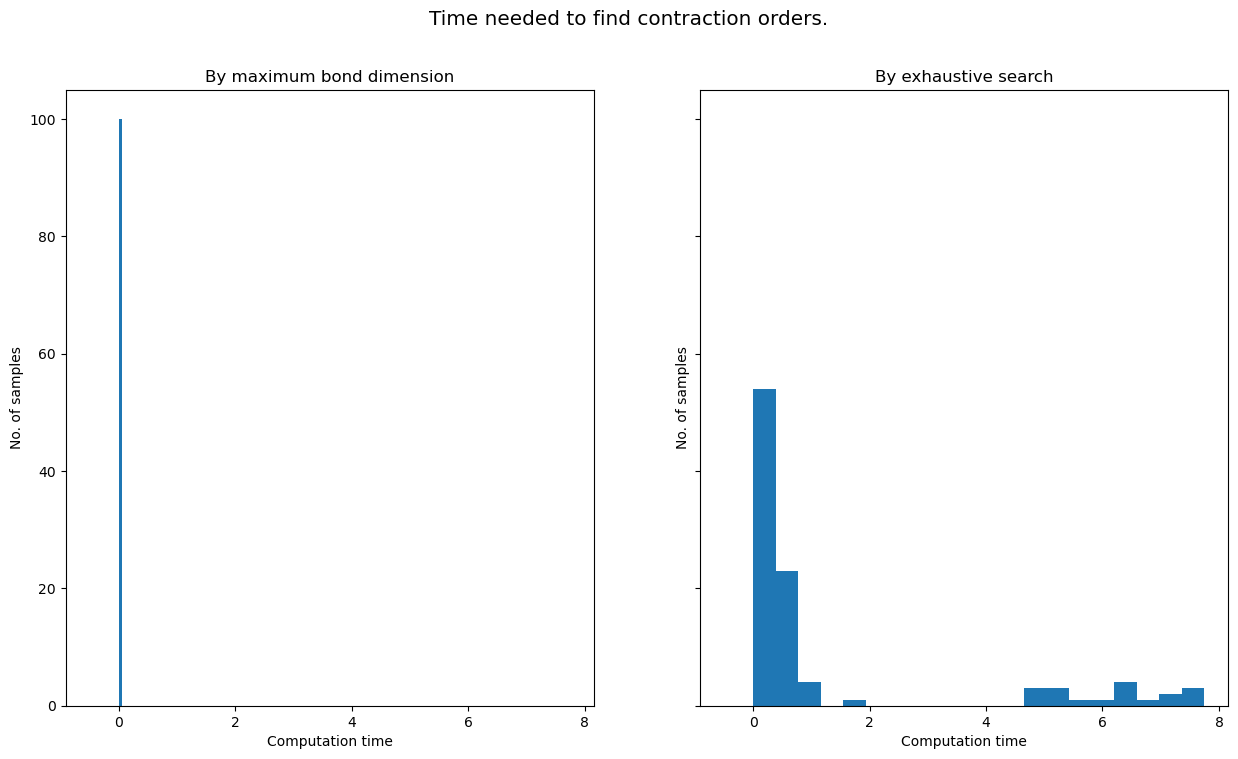

In [9]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 8))

num_bins = 20

fig.suptitle("Time needed to find contraction orders.", fontsize="x-large")

axs[0].hist(find_time_max_list, bins=num_bins)
axs[0].set_ylabel("No. of samples")
axs[0].set_xlabel("Computation time")
axs[0].set_title("By maximum bond dimension")

axs[1].hist(find_time_optimal_list, bins=num_bins)
axs[1].set_ylabel("No. of samples")
axs[1].set_xlabel("Computation time")
axs[1].set_title("By exhaustive search")

plt.show()

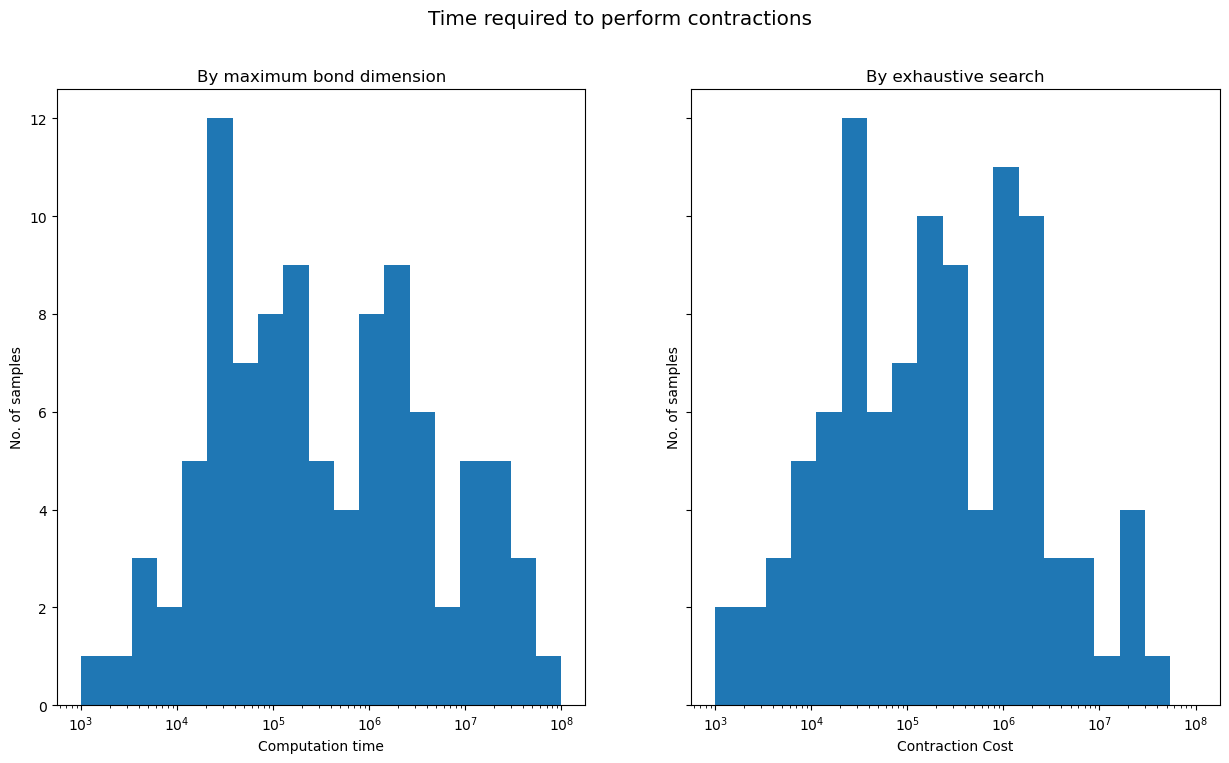

In [22]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15, 8))

fig.suptitle("Time required to perform contractions", fontsize="x-large")

bins = np.logspace(np.log10(1000),np.log10(1e8), 20)

axs[0].hist(contract_cost_max_list, bins=bins)
axs[0].set_xscale("log")
axs[0].set_ylabel("No. of samples")
axs[0].set_xlabel("Computation time")
axs[0].set_title("By maximum bond dimension")

axs[1].hist(contract_cost_optimal_list, bins=bins)
axs[1].set_xscale("log")
axs[1].set_ylabel("No. of samples")
axs[1].set_xlabel("Contraction Cost")
axs[1].set_title("By exhaustive search")

plt.show()

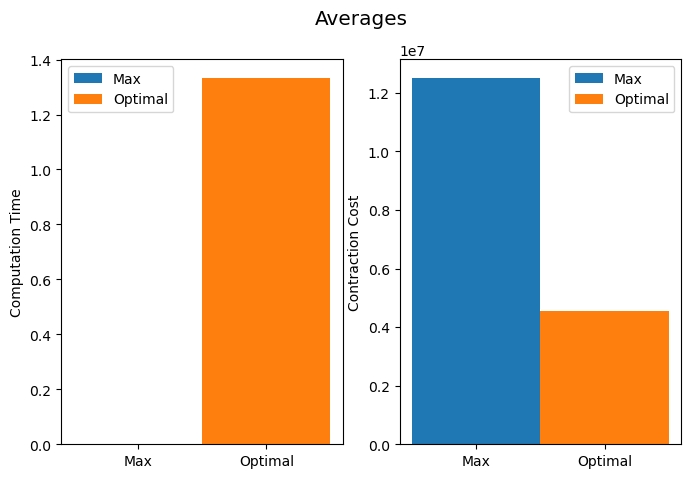

In [44]:
# Compute averages
def average(a_list):
    return sum(a_list) / len(a_list)

average_find_time_max = average(find_time_max_list)
average_find_time_optimal = average(find_time_optimal_list)
average_contraction_cost_max = average(contract_cost_max_list)
average_contraction_cost_optimal = average(contract_cost_optimal_list)

labels = ["Max", "Optimal"]
width = 0.35

fig, axs = plt.subplots(1, 2, figsize=(8,5))

fig.suptitle("Averages", fontsize="x-large")

axs[0].bar(width / 2, [average_find_time_max], width, label='Max')
axs[0].bar(width * 1.5, [average_find_time_optimal], width, label='Optimal')
axs[0].set_xticks([width / 2, width * 1.5], labels)
axs[0].set_ylabel("Computation Time")
axs[0].legend()

axs[1].bar(width / 2, [average_contraction_cost_max], width, label='Max')
axs[1].bar(width * 1.5, [average_contraction_cost_optimal], width, label='Optimal')
axs[1].set_xticks([width / 2, width * 1.5], labels)
axs[1].set_ylabel("Contraction Cost")
axs[1].legend()

plt.show()

What conclusion can you draw about the performance of both contraction methods?